<a href="https://colab.research.google.com/github/NataliaLak/Test_task/blob/main/Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [4]:
data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [5]:
le = LabelEncoder()
data['RiskLevel'] = le.fit_transform(data['RiskLevel'])

ohe = OneHotEncoder(sparse=False)

encoded_state = ohe.fit_transform(data['RiskLevel'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state,
                   columns=['RiskLevel' + str(i) for i in range(encoded_state.shape[1])])
df = pd.concat([data, tmp], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

In [7]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: RiskLevel, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

In [10]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

Confusion matrix, without normalization
[[ 59  11  20]
 [  4 103  27]
 [  9  61  41]]


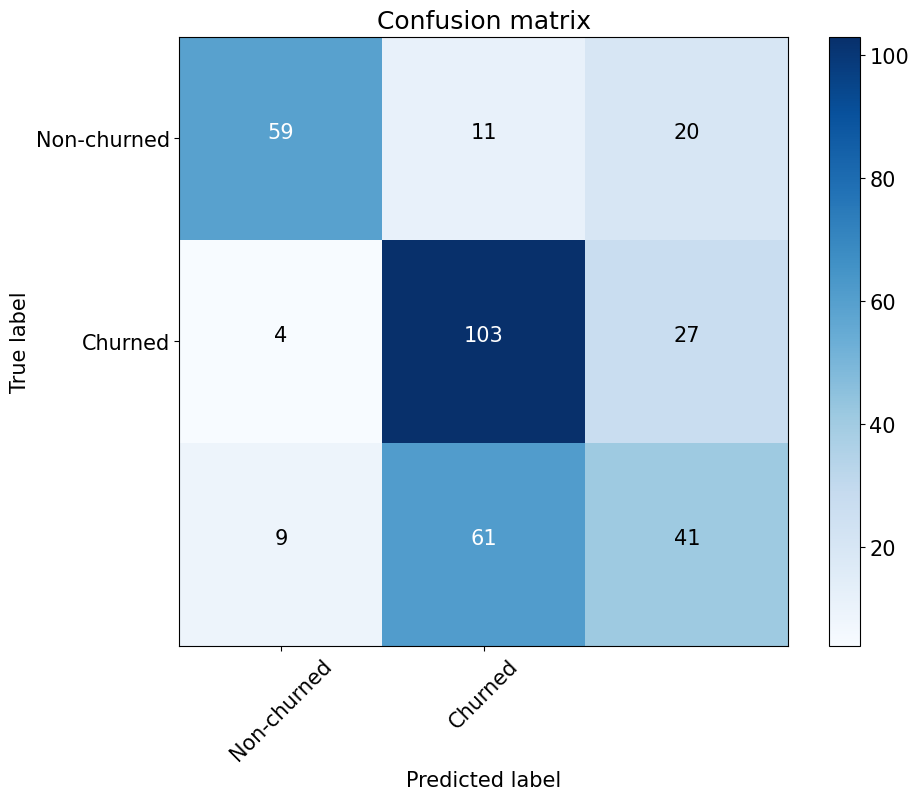

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Confusion matrix, without normalization
[[ 59  11  20]
 [  4 103  27]
 [  9  61  41]]


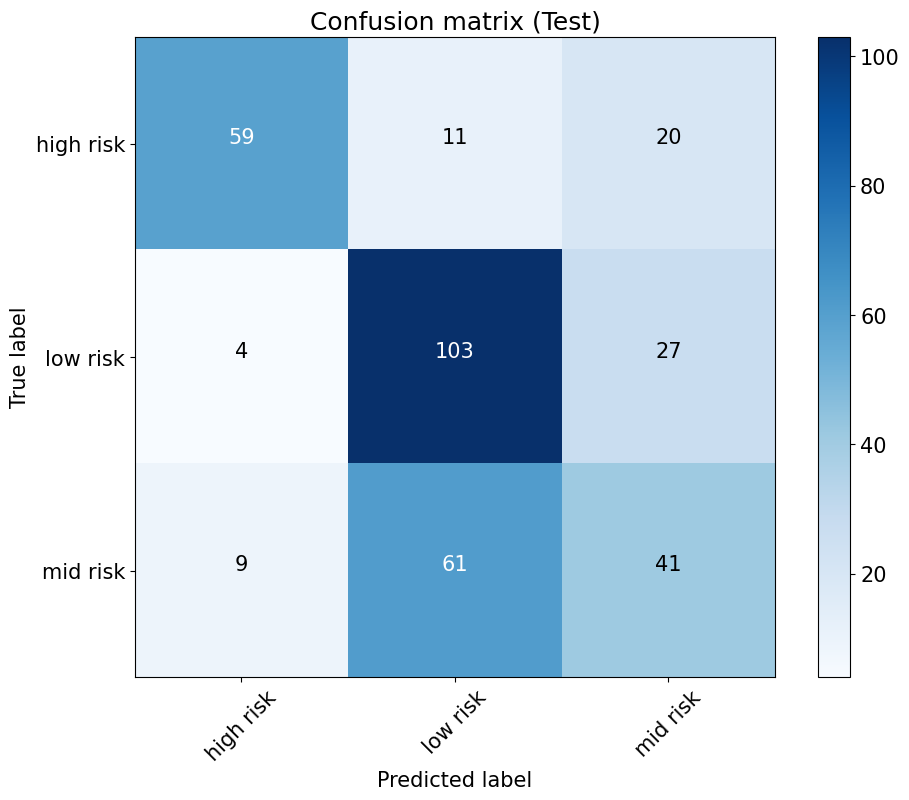

In [18]:
cnf_matrix_test = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_test, classes=le.classes_,
                      title='Confusion matrix (Test)')
plt.savefig("conf_matrix_test.png")
plt.show()

In [21]:
print("Metrics on Test Set:")
print("Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
print("F1 Score:", f1_score(y_test, lr.predict(X_test), average='weighted'))
print("Classification Report:")
print(classification_report(y_test, lr.predict(X_test)))

Metrics on Test Set:
Accuracy: 0.6059701492537314
F1 Score: 0.5988883055409718
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        90
           1       0.59      0.77      0.67       134
           2       0.47      0.37      0.41       111

    accuracy                           0.61       335
   macro avg       0.62      0.60      0.60       335
weighted avg       0.61      0.61      0.60       335



Confusion matrix, without normalization
[[113  33  36]
 [  7 198  67]
 [ 25 102  98]]


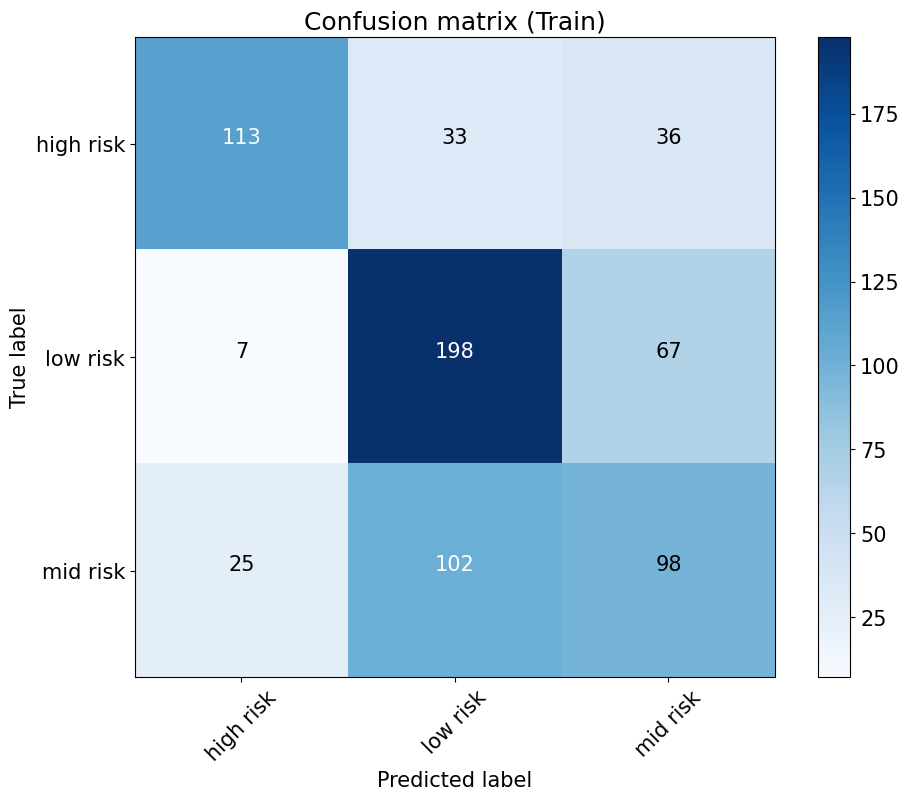

In [22]:
cnf_matrix_train = confusion_matrix(y_train, lr.predict(X_train))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_train, classes=le.classes_,
                      title='Confusion matrix (Train)')
plt.savefig("conf_matrix_train.png")
plt.show()

In [23]:
print("Metrics on Train Set:")
print("Accuracy:", accuracy_score(y_train, lr.predict(X_train)))
print("F1 Score:", f1_score(y_train, lr.predict(X_train), average='weighted'))
print("Classification Report:")
print(classification_report(y_train, lr.predict(X_train)))

Metrics on Train Set:
Accuracy: 0.6023564064801178
F1 Score: 0.5999166761688359
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       182
           1       0.59      0.73      0.65       272
           2       0.49      0.44      0.46       225

    accuracy                           0.60       679
   macro avg       0.62      0.59      0.60       679
weighted avg       0.61      0.60      0.60       679

